In [14]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Stock Price Modeling
- Time series is particularly popular in finance
- Used to model the price movement of almost all assets/commodities

### Model: value of the S&P 500
- [Data source](https://fred.stlouisfed.org/)
- Using nine years of data, starting Jan 01 2008
    - **Note** Using data starting July 2008, Thinkful dataset is down, was provided with an alternative but it's only on monthly intervals

In [15]:
sp_data_raw = pd.read_csv('SP500.csv')
sp_data = sp_data_raw.copy()
# Convert price to a number, with coersion to throw NA's if conversion not possible
sp_data['price'] = pd.to_numeric(sp_data.SP500, errors='coerce')

sp_data.dropna(inplace=True)
print(sp_data.head())
print(sp_data.shape)

         DATE    SP500    price
0  2008-07-31  1267.38  1267.38
1  2008-08-01  1260.31  1260.31
2  2008-08-04  1249.01  1249.01
3  2008-08-05  1284.88  1284.88
4  2008-08-06  1289.19  1289.19
(2266, 3)


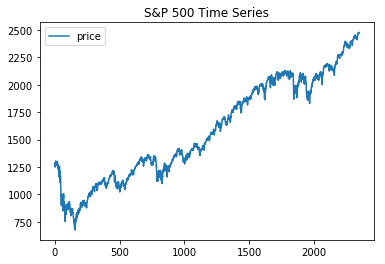

In [16]:
sp_data.plot()
plt.title('S&P 500 Time Series')
plt.show()

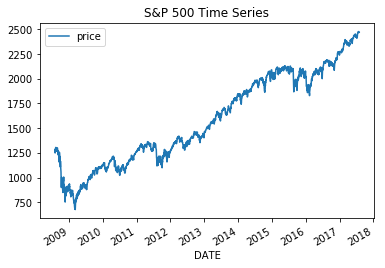

In [17]:
# convert x-axis to date based index
sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot()
plt.title('S&P 500 Time Series')
plt.show()

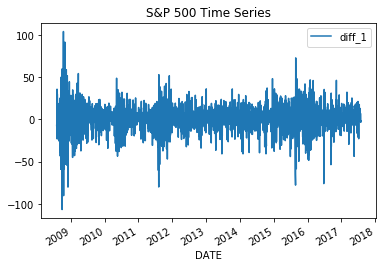

In [18]:
# need a stationary dataset
# this looks like it may have a trend to it, try plotting the difference
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1')
plt.title('S&P 500 Time Series')
plt.show()

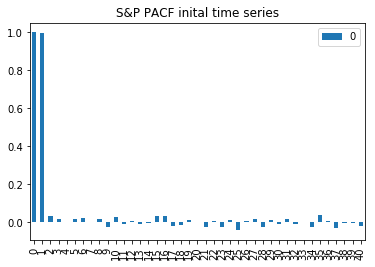

In [19]:
# also want to investigate the PACF (partial autocorrelation function)
# for the initial and differenced time series
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar')
plt.title('S&P PACF inital time series')
plt.show()

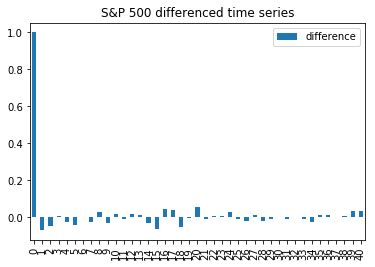

In [20]:
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title('S&P 500 differenced time series')
plt.legend(['difference'])
plt.show()

### Building Models
- Initial time series has 1 strong autocorrelation
- Differences don't show any real autocorrelation
- for the ARIMA, build a series of models with slightly different parameters
- Parameters are passed in (p, d, q) order
    - $p=AR$, past values
    - $d=I$, level of differencing
    - $q=MA$, adjusting to past errors

In [34]:
from statsmodels.tsa.arima_model import ARIMA
model_010 = ARIMA(sp_data.price, order=(0,1,0))
model_010_fit = model.fit()
print(model_010_fit.summary())
print('residuals description')
print(model_010_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2265
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9541.542
Method:                       css-mle   S.D. of innovations             16.328
Date:                Tue, 28 Aug 2018   AIC                          19107.084
Time:                        16:45:11   BIC                          19175.788
Sample:                             1   HQIC                         19132.152
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7059      0.476      1.484      0.138      -0.227       1.638
ar.L1.D.price     0.2273        nan        nan        nan         nan         nan
ar.L2.D.price     0.7223        nan     

In [35]:
from statsmodels.tsa.arima_model import ARIMA
model_100 = ARIMA(sp_data.price, order=(1,0,0))
model_100_fit = model.fit()
print(model_100_fit.summary())
print('residuals description')
print(model_100_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2265
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9541.542
Method:                       css-mle   S.D. of innovations             16.328
Date:                Tue, 28 Aug 2018   AIC                          19107.084
Time:                        16:45:51   BIC                          19175.788
Sample:                             1   HQIC                         19132.152
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7059      0.476      1.484      0.138      -0.227       1.638
ar.L1.D.price     0.2273        nan        nan        nan         nan         nan
ar.L2.D.price     0.7223        nan     

In [24]:
# try price_diff, log price data
#from statsmodels.tsa.arima_model import ARIMA
#model = ARIMA(sp_data.price, order=(1,0,1))
#model_fit = model.fit(disp=0)
#print(model_fit.summary())
#print('residuals description')
#print(model_fit.resid.describe())
# ------------------------------
# figure out why this errors:
# ValueError: The computed initial AR coefficients are not stationary
# You should induce stationarity, choose a different model order, or you can
# pass your own start_params.

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(sp_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('residuals description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2265
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9530.725
Method:                       css-mle   S.D. of innovations             16.263
Date:                Tue, 28 Aug 2018   AIC                          19069.449
Time:                        16:24:34   BIC                          19092.350
Sample:                             1   HQIC                         19077.805
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5315      0.284      1.873      0.061      -0.025       1.088
ar.L1.D.price     0.5852      0.175      3.339      0.001       0.242       0.929
ma.L1.D.price    -0.6555      0.163     

In [36]:
from statsmodels.tsa.arima_model import ARIMA
model_515 = ARIMA(sp_data.price, order=(5,1,5))
model_515_fit = model.fit()
print(model_515_fit.summary())
print('residuals description')
print(model_515_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2265
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -9541.542
Method:                       css-mle   S.D. of innovations             16.328
Date:                Tue, 28 Aug 2018   AIC                          19107.084
Time:                        16:48:19   BIC                          19175.788
Sample:                             1   HQIC                         19132.152
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7059      0.476      1.484      0.138      -0.227       1.638
ar.L1.D.price     0.2273        nan        nan        nan         nan         nan
ar.L2.D.price     0.7223        nan     

### Statsmodels output
**Most interested in**:
- Coefficients' p values:
    - Approximate whether the coefficient has a significant effect on outcome
    - Used to construct 95% confidence interval for coefficient
    - If zero is within that interval, coefficient is often considered potentially unnecessary
- Log likelihood:
    - Log of the likelihood that the given model would generate the data seen
    - Closer to zero means a higher probability that given model predicted the outcome
- Residuals statistics:
    - What is left over after building the model (difference between predicted and observed)
    - Residuals are very import in time series
    - Residuals should be random and normally distributed (same assumption from linear regression)

<Figure size 432x288 with 0 Axes>

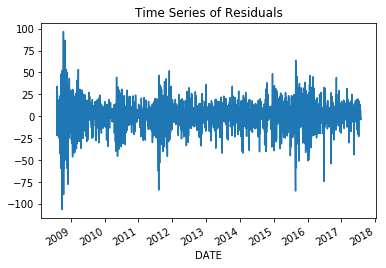

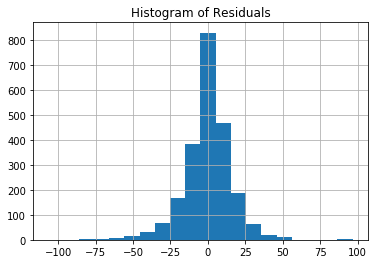

In [27]:
# validating residuals
residuals = pd.DataFrame(model_111_fit.resid)

plt.suptitle('Model Order (1,1,1)')

residuals.plot(legend=False)
plt.title('Time Series of Residuals')
plt.show()

residuals.hist(bins=20)
plt.title('Histogram of Residuals')
plt.show()

- Interpreting these plots, can make two reasonable assumptions:
    1. No clear trend in the residuals
        - Indicates no obviously missed seasonality
        - Some places have higher volatility
            - Could expand model to incorporate elements from outside time series to account for this
            - This would require a dataset with features, like with typical linear regression modeling coefficients
    2. Approximately standard normal
        - Tail on low end: small number of observations
        - Likely outliers or external influence

### Interpretting ARIMA (1,0,1)
(this model errored for my data, this is the interpretation from thinkful's data)
- Constant ~= 1700
- AR1 coeff ~= .9994: Each day is approximately equal to the previous day's value
- Moving average ~= .08: move against the previous error by about 8%
- AR1 abd MA combine to show a is steadily at the same level as the previous value, but compensating back slightly against any error

In [28]:
# drill: interpret output of ARIMA(1,1,1)
from statsmodels.tsa.arima_model import ARIMA
model_111 = ARIMA(sp_data.price, order=(1,1,1))
model_111_fit = model_111.fit()
print(model_111_fit.summary())
print('residuals description')
print(model_111_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 2265
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9530.725
Method:                       css-mle   S.D. of innovations             16.263
Date:                Tue, 28 Aug 2018   AIC                          19069.449
Time:                        16:26:16   BIC                          19092.350
Sample:                             1   HQIC                         19077.805
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5315      0.284      1.873      0.061      -0.025       1.088
ar.L1.D.price     0.5852      0.175      3.339      0.001       0.242       0.929
ma.L1.D.price    -0.6555      0.163     

**Drill**: Interpret ARIMA(1,1,1)

- Constant: 0.5315
- AR1 coef = 0.5815: each day is approximately ~58% of the previous day's value
- MA = .6555: will move against the previous error by ~6.5%
- Shows: a is 58% of the previous value with 6.5% compensation against error

### Comparing Models with AIC
**AIC (Akaike Information Criteria)**: measure of the degree of information contained in the model
- Want to minimize value of AIC
- Compare models by calculating ratios of AICs between them
    - Compared to minimal AIC, other models are compared in the context of information loss
    - Calculate probability that another model minimizes information loss: $exp((AIC_{min}-AIC_x)/2)$
    - Gives probability of having lost less information with the other model

In [39]:
print('ARIMA(1,1,1) AIC: {}'.format(model_111_fit.aic))
print('ARIMA(0,1,0) AIC: {}'.format(model_010_fit.aic))
print('ARIMA(1,0,0) AIC: {}'.format(model_100_fit.aic))
print('ARIMA(5,1,5) AIC: {}'.format(model_515_fit.aic))

ARIMA(1,1,1) AIC: 19069.449142961574
ARIMA(0,1,0) AIC: 19107.08435639135
ARIMA(1,0,0) AIC: 19107.08435639135
ARIMA(5,1,5) AIC: 19107.08435639135


In [48]:
print(model_010_fit.aic-model_111_fit.aic)

37.63521342977765


Essentially no support for models other than ARIMA(1,1,1) here, as $AIC_i-AIC_{min}>10$

[Source](https://stats.stackexchange.com/questions/232465/how-to-compare-models-on-the-basis-of-aic#answer-232494)